# Aula 3 - Criação de df e filtragem de dados

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução ao Pandas
- 2) Conceitos de Dataframe e Series
- 3) Axis e slicing: uso de loc/iloc
- 4) Criação e manipulação de DF e SS a partir de dicionário, listas e arrays
- 5) Filtragem de dados e parâmetro inplace
- 6) Criação e manipulação de colunas

_______

### Objetivos

Apresentar o pandas, frisando sua importância para o processamento de dados e em data science. Apresentar seus principais conceitos (Series, DataFrame) e funcionalidades (leitura de arquivo, filtros, seleção, apply, escrita de arquivos, etc.)

### Habilidades a serem desenvolvidas nessa aula

Ao final da aula o aluno deve:

- Conhecer o pandas, suas vantagens e principais usos;
- Entender o conceito de Series e como elas são construídas;
- Entender o conceito de DataFrame em termos das Series;
- Saber como trabalhar com DataFrames para o processamento de dados:
    - Seleções: uso de loc/iloc;
    - Filtros;
    - Criação de novas colunas.
- Saber como ler e escrever de/em um arquivo com o pandas (csv, excel, etc.).

____
____
____

## 1) Pandas

O pandas é uma das bibliotecas mais usadas em Data Science por ser fácil de usar além de ter alta performance. Ela utiliza dois objetos muito importantes que são as **Series** e os **DataFrames**.

### Instalação
Existem diversas formas de instalar o pandas. A mais simples é instalar o pacote Anaconda (https://www.anaconda.com/distribution/) que já vem com o Python e diversas bibliotecas científicas e ciência de dados instaladas.

Outra forma, caso você já tenha o python instalado mas não o pandas, é o utilizar o gerenciador e pacotes pip, através do comando no seu **terminal**:

`$ pip install pandas`

ou dentro do jupyter

`!pip install pandas`

In [ ]:
#!pip install pandas

### Importação
Assim como o `numpy` recebe um alias `np`, o pandas recebe o `pd`.

In [ ]:
import pandas as pd
import numpy as np

### Series
O objeto fundamental do Pandas são as **Series**.

As Series são originadas de um array unidimensional capaz de guardar qualquer tipo de dado (integers, strings, floating point numbers, Python objects, etc.). A **Series** é um megazord de junção entre listas, arrays e dicionários. E como as listas, as series podem conter dados de vários tipo.

In [ ]:
series = pd.Series([1, 2.0, 3 , 'Indiozinhos'])
series

Tipo de uma series:

Os **valores** (values) de uma series são armazenados como um **array** e podemos acessar os elementos com índices:

In [ ]:
# type da series


In [ ]:
type(series.values)

In [ ]:
# Acessa elementos


E assim como no numpy, também podemos realizar cálculos com os valores numéricos:

In [ ]:
series[0:3].mean()

Como as listas e dicionários, a series pode ter **elementos de diferentes tipos**. Na primeira posição temos um int enquanto na última temos uma string.

In [ ]:
[type(i) for i in series]

Também podemos criar um **índice** específico para cada elemento e acessá-lo com em um dicionário:

In [ ]:
series.index = ['um', 'dois', 'três', 'quatro']
series

In [ ]:
# acessa series pelo index


 Para entender mais sobre como trabalhar como séries, temos um conteúdo anexado no final desse notebook que você pode olhar.

### DataFrames

Em geral, os dados que armazenamos e utilizamos diariamente estão dispostos em formato de tabelas nos quais as colunas representam atributos dos dados e as linhas representam diferentes observações. <br>
Os **Dataframes** são objetos capazes de armazenar e manipular esse dados dispostos como tabelas, tornando-o muito similar a uma planilha Excel.

<img src="pandas-data-structure.svg"  style="width: 600px" >

As colunas e linhas dos DataFrames são formadas por **Series**. <br>

Antes de conhecer o dataframe do Pandas, vamos ler o arquivo "alunos.csv", da forma como aprendemos na aula de arquivos

In [ ]:
import csv

f = open("./data/alunos.csv", "r")

leitor = csv.reader(f, delimiter=';', lineterminator='\n')

planilha = []

for linha in leitor:
    planilha.append(linha)
    
f.close()

planilha

Como fizemos na aula, uma vez lido o arquivo, é possível processá-lo de diversas maneiras.

Por exemplo, para obter **a primeira coluna**, isto é, os nomes, fazemos:

In [ ]:
[item[1] for item in planilha if item[1]!='Nome']

Agora, vamos usar o Pandas e aprender uma forma muito mais fácil de processar dados!

In [ ]:
# lendo o arquivo ./data/alunos.csv


## 2. Selecionando Colunas

Podemos **acessar os valores nas colunas** pelo nome delas:

In [ ]:
# acessar coluna "Nome" diretamente


In [ ]:
# acessar coluna "Nome" através de uma variável


Dá pra **selecionar apenas algumas colunas** do dataframe (ou seja, criando um sub-dataframe):

In [ ]:
# pegando apenas a coluna "Nome" e resultado da "Prova_1"


## 3. Acessando linhas e elementos

Podemos utilizar o `.loc[nome_linhas, nome_colunas]` para acessar determinas colunas e as linhas através dos índices e nomes das colunas.

In [ ]:
# selecionar todas as linhas das colunas ['Nome','Prova_1']


In [ ]:
# selecionar linhas 3 à 5 das colunas ['Nome','Prova_1']


In [ ]:
# selecionar linhas 3,5,9 das colunas ['Nome','Prova_1']
tabela.loc[[3,5,9], ["Nome", "Prova_1"]]

In [ ]:
# selecionar as linhas das colunas Prova_1 até Prova_4
tabela.loc[:, 'Prova_1':'Prova_4']

selecionar apenas uma linha de uma coluna

In [ ]:
tabela.loc[9, "Nome"]

É possível **alterar valores** da tabela. Para isso, primeiro localizamos o valor a ser alterado com o **.loc**, passando a linha e coluna correspondente, e depois atribuímos o novo valor

In [ ]:
tabela.loc[7, "Nome"] = "Joãozinho"
tabela.loc[7, "Frequencia"] = 100

In [ ]:
tabela

Vamos testar algo diferente:

In [ ]:
tabela = tabela.set_index('Nome')
tabela

Vamos tentar selecionar as linhas 3 à 5:

In [ ]:
tabela.loc[3:5, :]

O que aconteceu? <br>
O `.loc` faz o slice considerando o index da matriz e agora o index é o nome dos alunos. 

In [ ]:
tabela.loc['Francisco Cunha':'Juliana Arruda', :]

E se por algum motivo eu quisesse acessar esse índice pela posição numérica? <br>
Ai precisaremos do **.iloc()**

In [ ]:
tabela.iloc[3:5]

## 4. Seleção através das posições das linhas e colunas
Outra forma de acessarmos dados é através do `.iloc[número_linhas, número_colunas]` utilizando as posições das linhas e colunas

In [ ]:
# seleciona uma linha de uma coluna


In [ ]:
# seleciona todas as colunas de uma linha


In [ ]:
# seleciona um conjunto de linhas sequenciais de um conjunto de colunas sequenciais
tabela.iloc[3:5, 2:6]

In [ ]:
# seleciona um conjunto de linhas sequenciais de um conjunto de colunas não sequenciais
tabela.iloc[3:5, [1,5]]

### .reset_index()
Para resetar o index e voltarmos a ter os valores originais:

Repare que quando utilizamos o `inplace=True` como um argumento do método nós não precisamos referenciar o dataframe. <br>
Nós podemos utilizar o `inplace=True` em vários métodos do pandas.

## 5. Diferença entre .loc e .iloc
O .loc irá trazer o dado utilizando o nome do índice, não importando se o índice não está ordenado. Já o .iloc irá respeitar a ordem atual dos dados

In [ ]:
tabela_copy = tabela.copy()

In [ ]:
# vamos bagunçar o índice do df chamado tabela
tabela_copy.index = sorted(tabela.index.values, reverse=True)
tabela_copy

In [ ]:
# .loc traz o índice
tabela_copy.loc[[2,4],:]

In [ ]:
# iloc traz a linha
tabela_copy.iloc[[2,4],:]

_________________
_________________


**Exercício:** Com o df *vendas_diarias* abaixo, entenda como ele foi criado e selecione apenas as quantidades vendidas entre os dias 4 e 6. Com o método `.sum()` ensinado na aula de `numpy`, tente encontrar a soma desses valores.

In [ ]:
vendas_diarias = pd.DataFrame([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
                              index=pd.date_range("20220101", periods=10), 
                              columns=['Vendas'])
vendas_diarias

In [ ]:
# Resposta:


_________________
_________________


## 6. Criar novas colunas

In [ ]:
# cria coluna com valores 1


In [ ]:
# cria coluna vazia ""


In [ ]:
# cria coluna nan


_________________
_________________

**Exercício:** Crie uma coluna com um valor único de string a sua escolha

In [ ]:
# Resposta:


_________________
_________________


Também é possível **criar uma linha nova** atribuindo valores para todas as colunas:

In [ ]:
tabela.loc[10, :] = ["Joãozinho", 100, 10, 4, 6, 7, 2, "bbb", "cheio",'b', 'não vazio']

tabela

Se você usar o index de uma linha que já existe esse comando irá substituí-la.

## 7. Operações entre colunas
Podemos fazer **operações entre os valores das colunas**, e criar com isso novas colunas!

In [ ]:
# calculando a média usando as colunas Prova_1, Prova_2, Prova_3 e Prova_4
tabela["média"] = (tabela["Prova_1"] + tabela["Prova_2"] + 
                   tabela["Prova_3"] + tabela["Prova_4"])/4

Também há alguns métodos prontos que facilitam a utilização:

In [ ]:
# calculando a media com o método .mean(axis=?)
tabela["media_2"] = tabela[["Prova_1", "Prova_2", "Prova_3", "Prova_4"]].mean(axis=?)

tabela

Naturalmente, o resultado é o mesmo!

## 8. Métodos:

O Pandas possui diversos métodos que podem ser utilizados nessa estrutura.
Abaixo estão alguns métodos que essa estrutura de dados possui e facilitam alguns cálculos e análises [link](https://pandas.pydata.org/pandas-docs/version/0.23/api.html#api-panel-stats):
 

| Método      | Descrição     |
| ----------- | -----------   |
| sum         | soma          |
| mean        | média         |
| std         | desvio padrão |
| mode        | moda          |
| max         | valor máximo  |
| min         | valor mínimo  |
| idxmax      | primeiro índice com valor máximo |
| idxmin      | primeiro índice com valor mínimo |
| cumsum | soma cumulativa |
| cumprod | produto cumulativo |
| abs    | valor absoluto |




Na próxima aula veremos mais alguns.

<br>

_________________
_________________

**Exercício:** Seguindo e exemplo da aula anterior e o que foi visto na aula de numpy, encontre a menor nota de cada prova e a menor nota por aluno.

In [ ]:
# Encontre a menor nota de cada aluno


In [ ]:
# Encontre a menor nota de cada prova (menor valor para prova_1, para prova_2 ...)


_________________
_________________


## 9. Filtros

Podemos **fazer filtros** muito facilmente

Basta explicitarmos **condições sobre os valores das colunas**, e utilizar isso como indexador do dataframe!

In [ ]:
# retorna o sub-dataframe que contém valores maiores que 7 na coluna "média"
# ou seja, é um filtro que utiliza a coluna "média"!



Se quisermos fazer filtros mais complexos (filtros compostos, em mais de uma coluna), podemos fazer **conjunções entre filtros**, utilizando os **operadores lógicos de conjunção**.

Obs.: temos os seguintes operadores lógicos:

- &     - corresponde ao "and"
- |     - corresponde ao "or"
- ~     - corresponde ao "not"

In [ ]:
# filtar tabela para média > 7 e frequencia >= 20
tabela[(tabela["média"] > 7) & (tabela["Frequencia"] >= 20)]

In [ ]:
# filtar tabela para média > 7 e frequencia >= 20
tabela[(tabela["média"] > 7) | (tabela["Frequencia"] >= 20)]

In [ ]:
# pegando somente a coluna "média" dos alunos que tiveram nota > 7 na prova 1 e frequencia maior igual a 20
tabela[(tabela["média"] > 7) & (tabela["Frequencia"] >= 20)]["média"]

In [ ]:
# calculando a média de todos os alunos que tiveram nota  > 7 na prova 1 e frequencia maior igual a 20
tabela[(tabela["média"] > 7) & (tabela["Frequencia"] >= 20)]["média"].mean()

In [ ]:
# Podemos criar um novo df diretamento do filtro
prova_4 = tabela[tabela['Prova_4']>=7].copy()
prova_4

### Outras formas de filtrar: 
#### `.query()`

In [ ]:
prova_4 = tabela.query('Prova_4 >= 7 and Prova_3 >= 7')
prova_4

#### `.between()`

In [ ]:
tabela[tabela['Prova_4'].between(8,10)]

#### `.isin()`

In [ ]:
tabela[tabela['Nome'].isin(['Ana Beatriz', 'Francisco Cunha'])]

#### `.str.contains()`

In [ ]:
tabela.loc[8, 'Nome'] = 'Maria Arruda'
tabela

In [ ]:
tabela[tabela['Nome'].str.contains('Arruda')]

In [ ]:
tabela[tabela['Nome'].str.contains('Arruda|Tavares')]

## 10. Outros conteúdos

### Criar Series a partir de listas

Podemos criar uma series **a partir de uma lista**, usando a função do pandas `pd.Series()`: 

In [ ]:
# definindo uma série com valores e indices
indices = ["a", "b", "c", "d"]
lista = [10, 20, 30, 40]

serie = pd.Series(data = lista, index = indices)

serie

Podemos acessar o elemento 30, que está associado ao índice c:

In [ ]:
serie['c']

Para retornar todos os índices podemos utilizar o método `series.index`

In [ ]:
serie.index

E para acessar os valores podemos utilizar o atributo `series.values`


In [ ]:
serie.values

### Utilizando filtros em Series
Podemos aplicar filtros para selecionar apenas os elementos que satisfaçam determinada condição.
No exemplo abaixo, iremos selecionar apenas os elementos que sejam maiores que 15:


In [ ]:
serie[serie > 15] 

Note que `serie > 15` nos retorna uma series com elementos `True` e `False`, caso os elementos da serie satisfaçam a condição. Ao utilizar esse comando dentro dos colchetes, `serie[serie > 15]`, estamos selecionado apenas os elementos que satisfazem a condição.


### Criar Series a partir de dicionários
Também podemos **criar uma série a partir de um dicionário**, e os índices e valores são automaticamente capturados:

In [ ]:
# criando uma série a partir de um dicionario
dic2 = {"nome": "André", 
        "idade" : 23}

pd.Series(dic2)

### Criar dicionários a partir de Series
O inverso também é possível:

In [ ]:
dicionario = dict(serie)

dicionario

### Estrutura do df
O DataFrame é uma estrutura que se assemelha a uma tabela/planilha, como vimos acima.

Por debaixo dos panos, o dataframe é representado por um dicionário em que a **chave** é o **nome da coluna** e os **valores** são as **Series** (todas com mesmo índice).

### Criação de df a partir de dicionários

Assim, podemos **criar um dataframe a partir de um dicionario**, usando a função `pd.DataFrame()` 

In [ ]:
cadastro = {"nomes" : ["André", "Mariazinha"],
                "idade" : [22, 25],
                "cidade" : ["Mauá", "Santo André"],
                "filhos": [0, 0],
                "altura" : [1.80, 1.65]}

cadastro

In [ ]:
# criando um dataframe a partir de um dicionario
df = pd.DataFrame(cadastro)
df

### Criar dataframe a partir de listas

In [ ]:
# Considere a seguinte lista
age = [['Artur', 95.5, "M"], ['Vera', 79.7, "F"],
       ['Mônica', 85.1, "F"], ['Toni', 75.4, "M"]]
  
# Cria um pandas dataframe passando a lista e, se quiser, o nome das colunas
pd.DataFrame(age, columns=['Npme', 'Pontos', 'Sexo'])

### Criar dataframe a partir de array

In [ ]:
import numpy as np

# Considere o seguinte array:
my_array = np.random.randint(1, 10, 18)

# Cria um pandas dataframe passando o array e, se quiser, o nome das colunas
pd.DataFrame(my_array.reshape(-1,3), columns=['col_1','col_2','col_3'])


### Converter tabela para markdown
<img src="pandas_2_markdown.jpeg"  style="width: 300px" >


## 11. Referências
[Documentação](https://pandas.pydata.org/docs/user_guide/10min.html)

## 12. Exercícios

1 - Realize os passos seguintes utilizando o mesmo dataset do íris da aula anterior ('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data').

a. Use o pandas para ler o arquivo como um dataframe. Obs: precisa ler o dataframe sem que a primeira linha corresponda ao nome das colunas.

b. Sabendo que as cinco colunas correspondem, nessa ordem, a: 
   * 1. sepal length (cm)
   * 2. sepal width (cm)
   * 3. petal length (cm)
   * 4. petal width (cm)
   * 5. class: <br>
        - Iris Setosa <br>
        - Iris Versicolor <br>
        - Iris Virginica <br>

Leia novamente o arquivo passando o nome das colunas como argumento.

c. Crie uma coluna para o volume sabendo que ele é calculado por (pi x petallength x sepal_length^2)/3

c. Calcule a média de cada atributo das flores.

Exemplo de resposta:
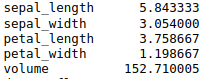

d. Novamente, calcule a média de cada atributo das flores só que agora faça-o separadamente para cada um dos tipos de íris indicados na coluna "class". 
Utilize o loop for para reduzir quantidade de linhas. <br>
Existe diferença entre as médias de cada um dos atributos das flores?

Exemplo de resposta:
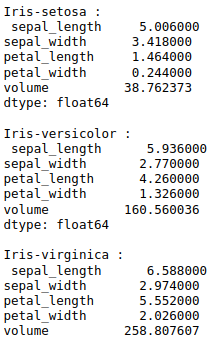

e. Adicione uma nova coluna com o valor da média de 'sepal length' apenas para a íris da classe Iris-setosa.

f. Adicione uma coluna com a média de 'sepal length' de tal forma que cada tipo de íris tenha seu respectivo valor de média. Utilize o loop for e faça isso sem utilizar métodos que não foram ensinados na aula de hoje.

g. Salve apenas o valor da classe, da média do sepal length e do volume desse dataset em um arquivo csv sem a coluna de index.